In [1]:
import pandas as pd
import numpy as np
import h5py
import datetime
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

file_name = "data/210409/blank_210409.h5"
h5_file = h5py.File(file_name, "r")

In [4]:
insertions = list(h5_file['session003/cal001'].keys())
vis_waves = h5_file['session003/cal001'].attrs['spec1_wavelengths_vector'][:]
ftir_waves = h5_file['session003/cal001'].attrs['spec2_wavelengths_vector'][:]


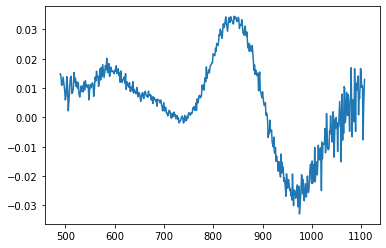

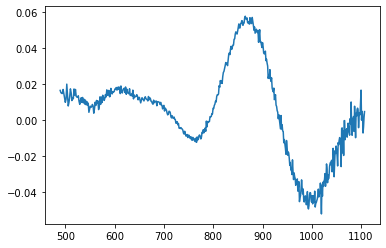

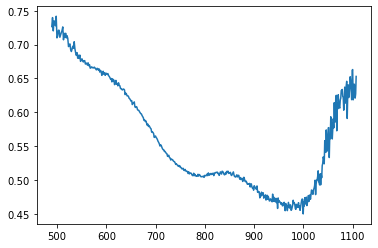

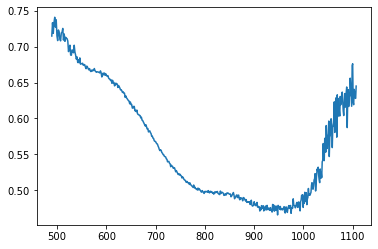

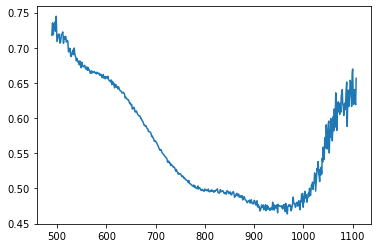

In [6]:
for insertion in insertions:
    fig, ax = plt.subplots()
    absorb = h5_file[f'session003/cal001/{insertion}/spectrometer1/derived/absorbances'][:]
    ax.plot(vis_waves, absorb.mean(axis=0))

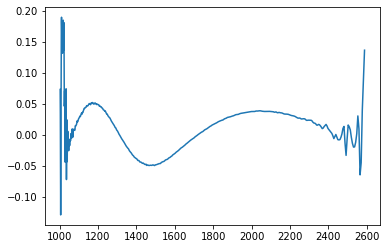

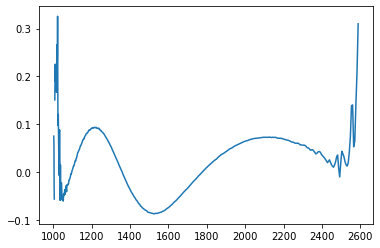

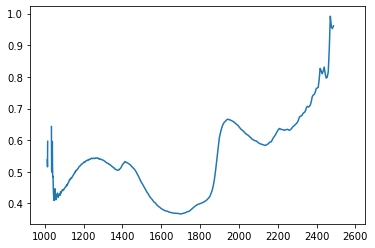

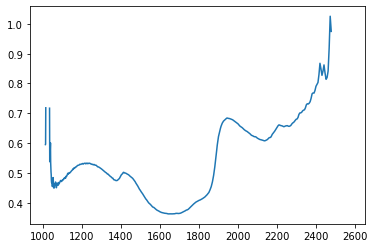

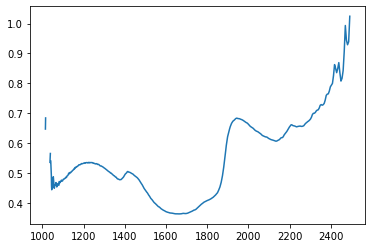

In [7]:
for insertion in insertions:
    fig, ax = plt.subplots()
    absorb = h5_file[f'session003/cal001/{insertion}/spectrometer2/derived/absorbances'][:]
    ax.plot(ftir_waves, absorb.mean(axis=0))

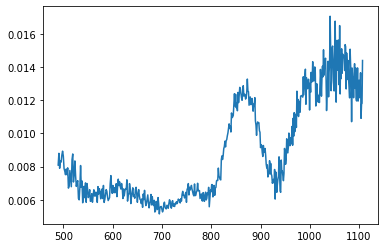

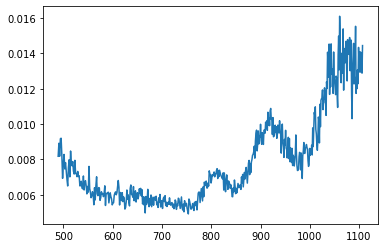

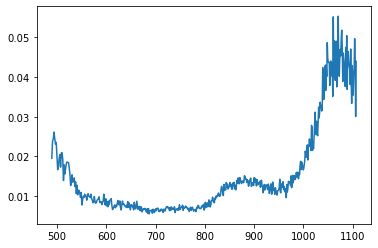

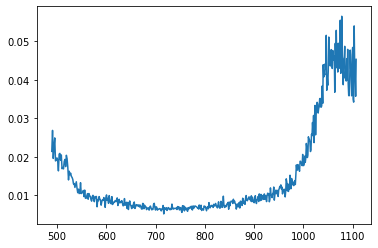

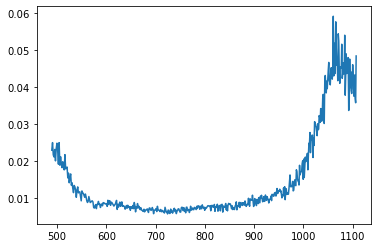

In [8]:
for insertion in insertions:
    fig, ax = plt.subplots()
    absorb = h5_file[f'session003/cal001/{insertion}/spectrometer1/derived/absorbances'][:]
    ax.plot(vis_waves, absorb.std(axis=0))

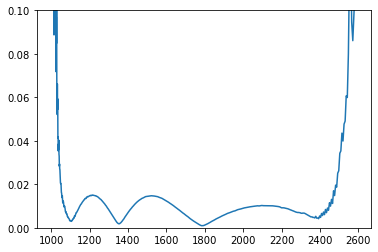

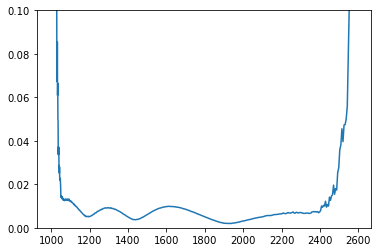

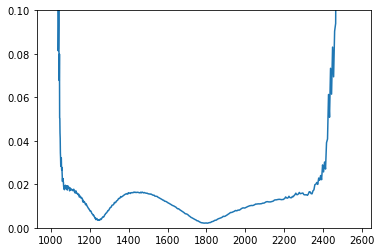

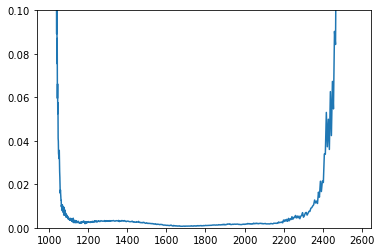

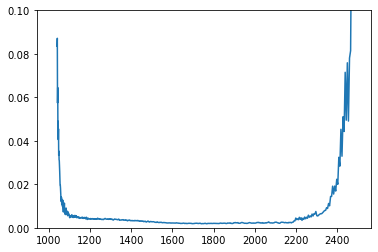

In [10]:
for insertion in insertions:
    fig, ax = plt.subplots()
    absorb = h5_file[f'session003/cal001/{insertion}/spectrometer2/derived/absorbances'][:]
    ax.set_ylim(0, 0.10)
    ax.plot(ftir_waves, absorb.std(axis=0))

In [11]:
moving_insertions = list(h5_file['session003/cal002'].keys())
vis_waves = h5_file['session003/cal002'].attrs['spec1_wavelengths_vector'][:]
ftir_waves = h5_file['session003/cal002'].attrs['spec2_wavelengths_vector'][:]

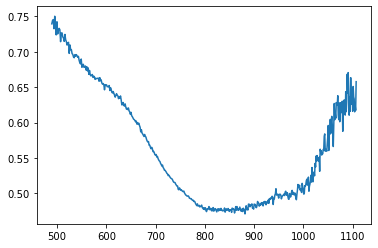

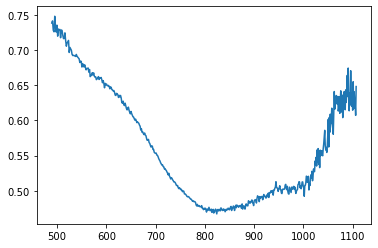

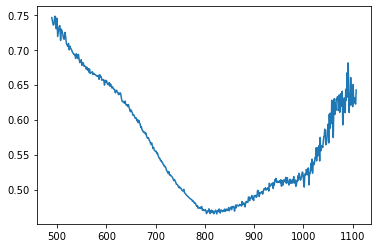

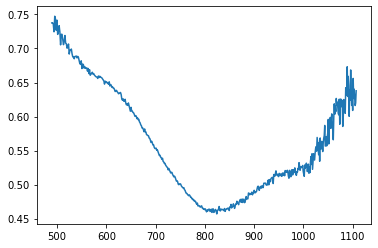

In [12]:
for insertion in moving_insertions:
    fig, ax = plt.subplots()
    absorb = h5_file[f'session003/cal002/{insertion}/spectrometer1/derived/absorbances'][:]
    ax.plot(vis_waves, absorb.mean(axis=0))

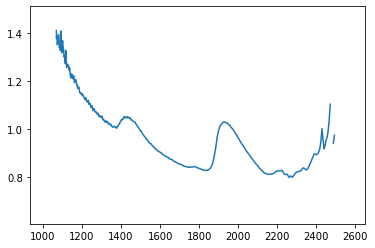

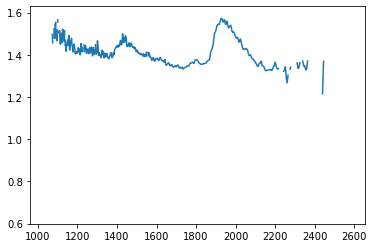

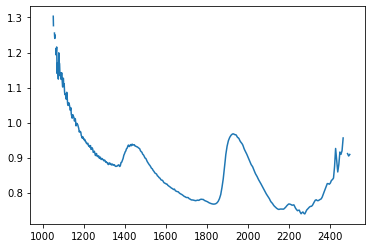

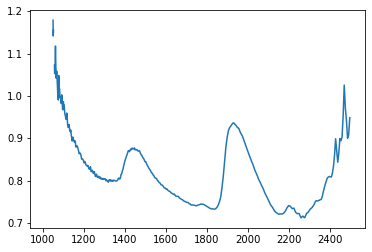

In [14]:
for insertion in moving_insertions:
    fig, ax = plt.subplots()
    absorb = h5_file[f'session003/cal002/{insertion}/spectrometer2/derived/absorbances'][:]
    ax.plot(ftir_waves, absorb.mean(axis=0))

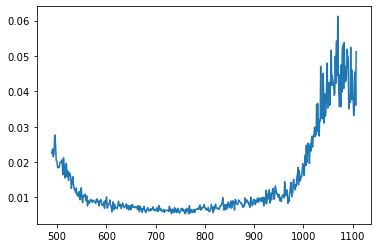

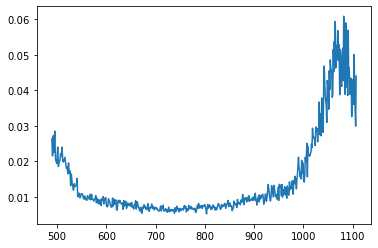

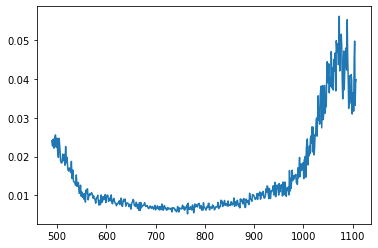

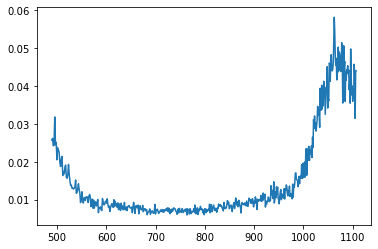

In [15]:
for insertion in moving_insertions:
    fig, ax = plt.subplots()
    absorb = h5_file[f'session003/cal002/{insertion}/spectrometer1/derived/absorbances'][:]
    ax.plot(vis_waves, absorb.std(axis=0))

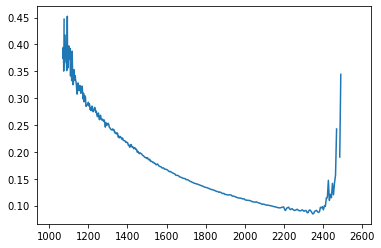

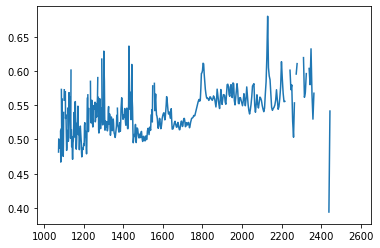

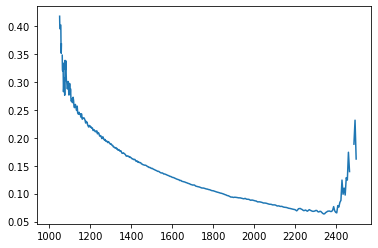

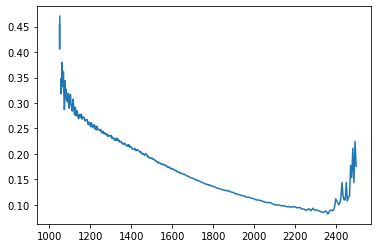

In [16]:
for insertion in moving_insertions:
    fig, ax = plt.subplots()
    absorb = h5_file[f'session003/cal002/{insertion}/spectrometer2/derived/absorbances'][:]
    ax.plot(ftir_waves, absorb.std(axis=0))

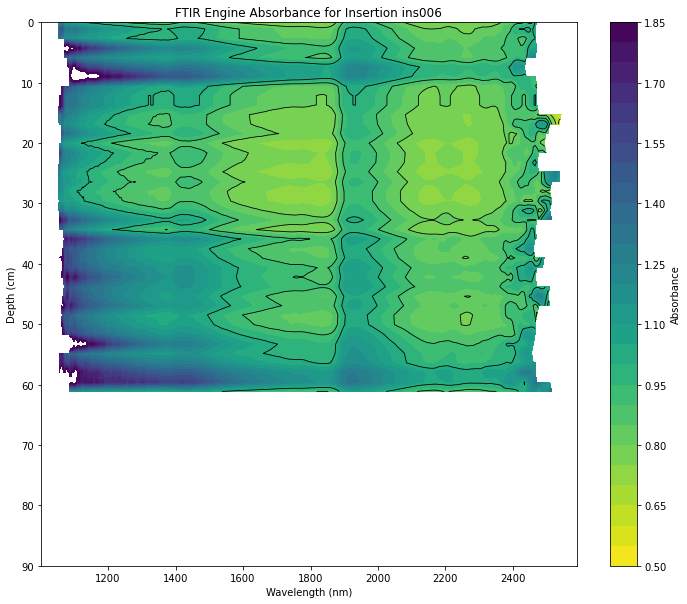

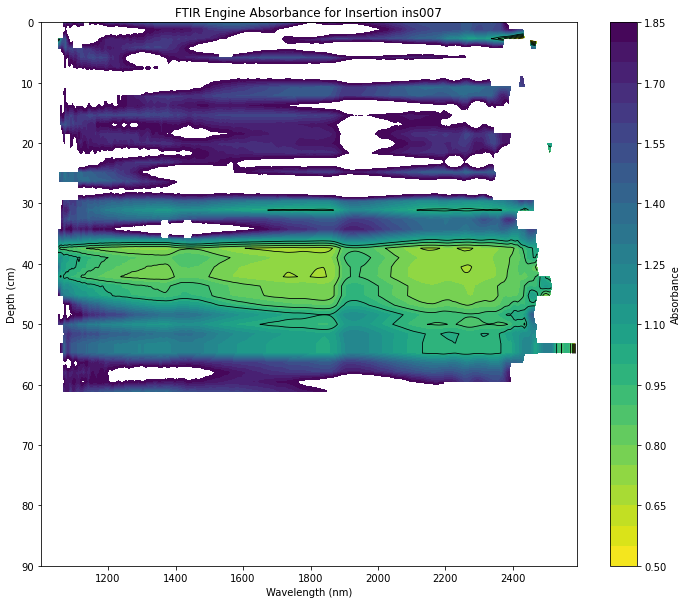

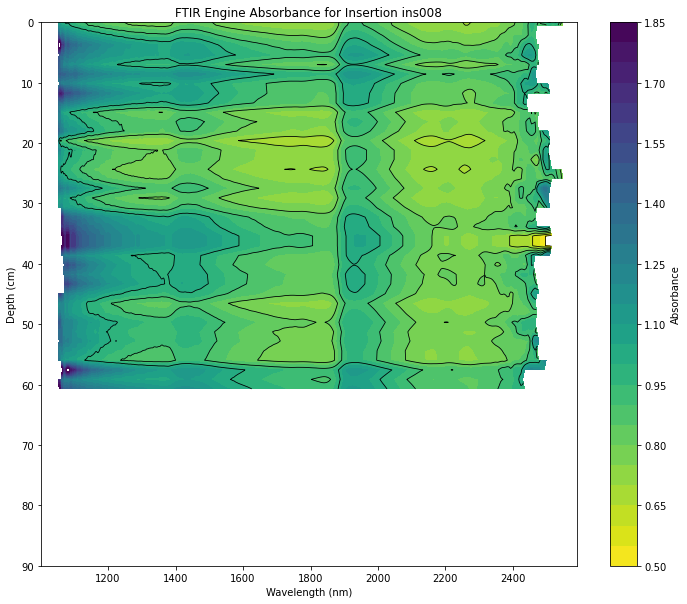

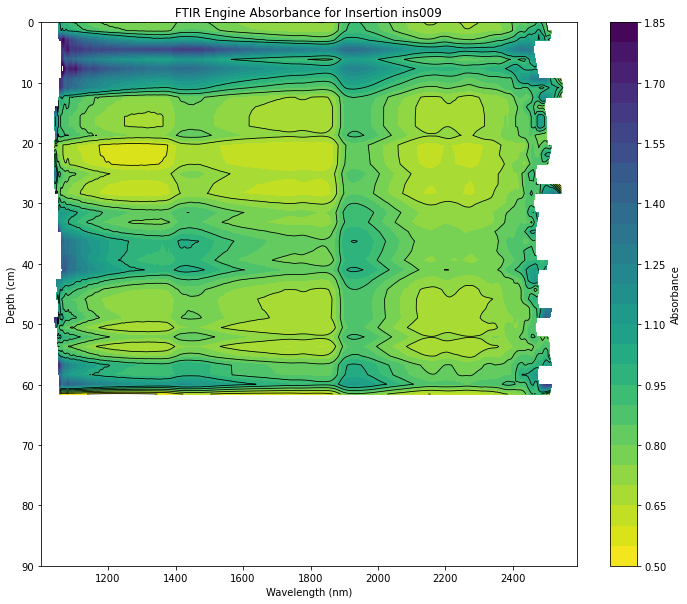

In [21]:
for insertion in moving_insertions:
    ins_abs = h5_file[f'session003/cal002/{insertion}/derived/absorbance_depth'][:, 512:-2]
    ins_depths = h5_file[f'session003/cal002/{insertion}/derived/absorbance_depth'][:, -1]
    y = ins_depths
    x = ftir_waves
    z = savgol_filter(ins_abs, 15, 3, axis=1)
    X, Y = np.meshgrid(x, y)

    levels = np.arange(0.5, 1.9, 0.05)
    clevels = [0.50, 0.60, 0.70, 0.8, 0.9, 1.0]
    fig, ax = plt.subplots(figsize = (12,10))

    ax.set_ylim(90, 0)
    ax.set_ylabel("Depth (cm)")
    ax.set_xlabel("Wavelength (nm)")
    ax.set_title(f"FTIR Engine Absorbance for Insertion {insertion}")
    cont = ax.contourf(X, Y, z, levels=levels, cmap='viridis_r')
    ax.contour(X, Y, z, levels=clevels, colors='k', linewidths=0.8)

    cbar = fig.colorbar(cont)
    cbar.ax.set_ylabel('Absorbance')

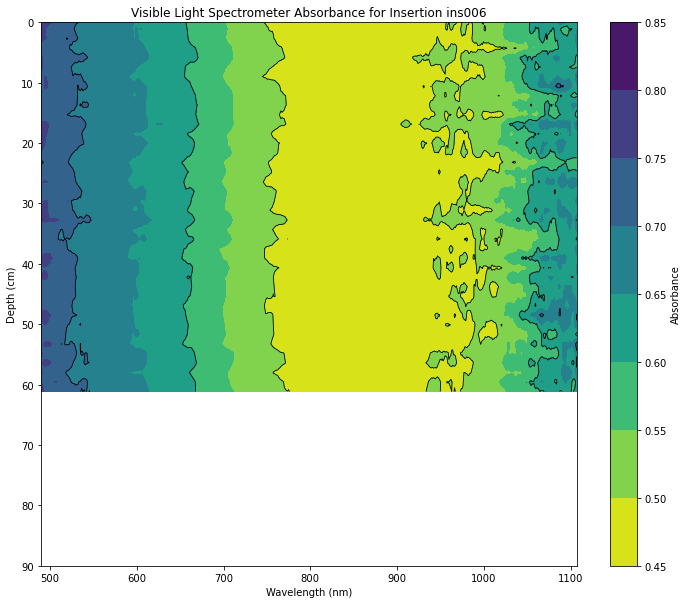

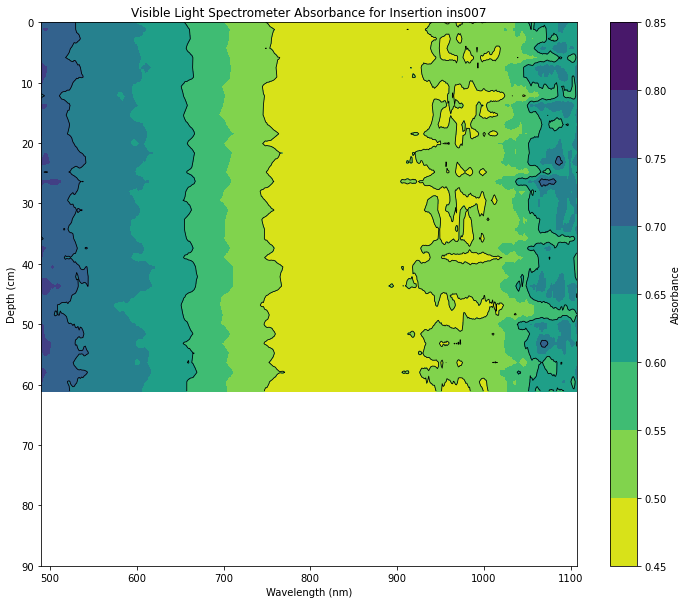

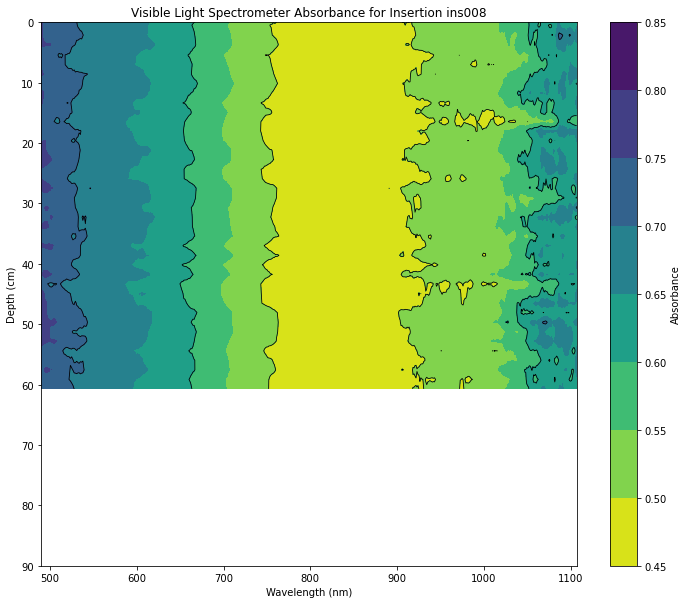

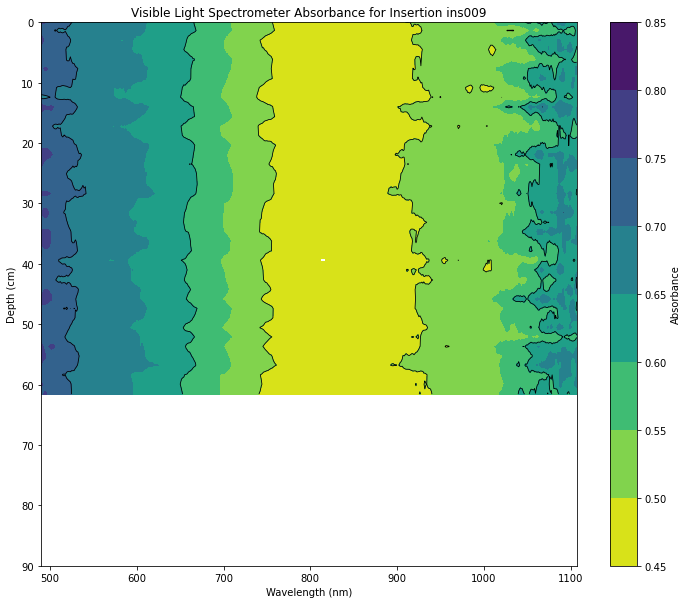

In [22]:
for insertion in moving_insertions:
    ins_abs = h5_file[f'session003/cal002/{insertion}/spectrometer1/derived/absorbances'][:]
    ins_depths = h5_file[f'session003/cal002/{insertion}/derived/absorbance_depth'][:, -1]
    y = ins_depths
    x = vis_waves
    z = savgol_filter(ins_abs, 15, 3, axis=1)
    X, Y = np.meshgrid(x, y)
    
    levels = [0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85]
    clevels = [0.50, 0.60, 0.70]
    fig, ax = plt.subplots(figsize = (12,10))
    
    ax.set_ylim(90, 0)
    ax.set_ylabel("Depth (cm)")
    ax.set_xlabel("Wavelength (nm)")
    ax.set_title(f"Visible Light Spectrometer Absorbance for Insertion {insertion}")
    cont = ax.contourf(X, Y, z, levels=levels, cmap='viridis_r')
    ax.contour(X, Y, z, levels=clevels, colors='k', linewidths=0.8)

    cbar = fig.colorbar(cont)
    cbar.ax.set_ylabel('Absorbance')

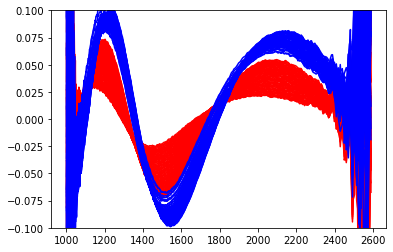

In [28]:

fig, ax = plt.subplots()
absorb001 = h5_file[f'session003/cal001/ins001/spectrometer2/derived/absorbances'][:]
absorb002 = h5_file[f'session003/cal001/ins002/spectrometer2/derived/absorbances'][:]
ax.set_ylim(-0.1, 0.1)
for i in range(absorb001.shape[0]):
    ax.plot(ftir_waves, absorb001[i, :], 'r-')
for i in range(absorb002.shape[0]):
    ax.plot(ftir_waves, absorb002[i, :], 'b-')


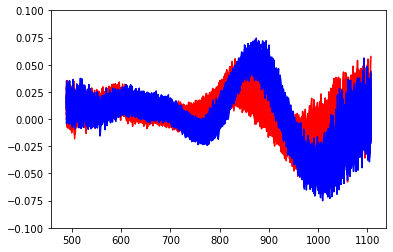

In [30]:
fig, ax = plt.subplots()
absorb001 = h5_file[f'session003/cal001/ins001/spectrometer1/derived/absorbances'][:]
absorb002 = h5_file[f'session003/cal001/ins002/spectrometer1/derived/absorbances'][:]
ax.set_ylim(-0.1, 0.1)
for i in range(absorb001.shape[0]):
    ax.plot(vis_waves, absorb001[i, :], 'r-')
for i in range(absorb002.shape[0]):
    ax.plot(vis_waves, absorb002[i, :], 'b-')

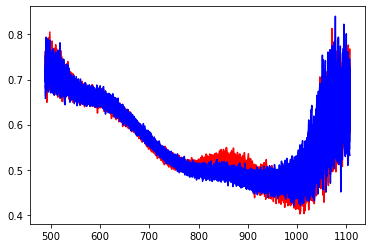

In [33]:
fig, ax = plt.subplots()
absorb003 = h5_file[f'session003/cal001/ins003/spectrometer1/derived/absorbances'][:]
absorb004 = h5_file[f'session003/cal001/ins004/spectrometer1/derived/absorbances'][:]

for i in range(absorb003.shape[0]):
    ax.plot(vis_waves, absorb003[i, :], 'r-')
for i in range(absorb004.shape[0]):
    ax.plot(vis_waves, absorb004[i, :], 'b-')

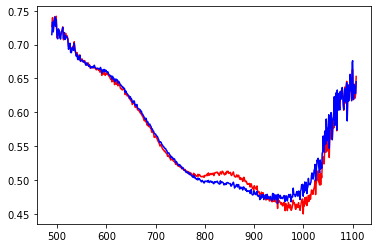

In [34]:
fig, ax = plt.subplots()
absorb003 = h5_file[f'session003/cal001/ins003/spectrometer1/derived/absorbances'][:]
absorb004 = h5_file[f'session003/cal001/ins004/spectrometer1/derived/absorbances'][:]


ax.plot(vis_waves, absorb003.mean(axis=0), 'r-')

ax.plot(vis_waves, absorb004.mean(axis=0), 'b-')

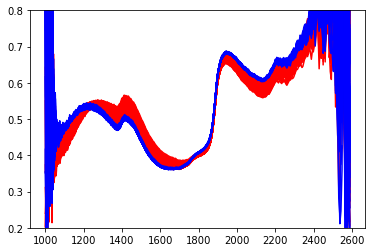

In [37]:
fig, ax = plt.subplots()
absorb003 = h5_file[f'session003/cal001/ins003/spectrometer2/derived/absorbances'][:]
absorb004 = h5_file[f'session003/cal001/ins004/spectrometer2/derived/absorbances'][:]
ax.set_ylim(0.2, 0.8)
for i in range(absorb003.shape[0]):
    ax.plot(ftir_waves, absorb003[i, :], 'r-')
for i in range(absorb004.shape[0]):
    ax.plot(ftir_waves, absorb004[i, :], 'b-')

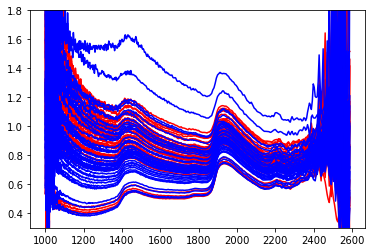

In [40]:
fig, ax = plt.subplots()
absorb008 = h5_file[f'session003/cal002/ins008/spectrometer2/derived/absorbances'][:]
absorb009 = h5_file[f'session003/cal002/ins009/spectrometer2/derived/absorbances'][:]
ax.set_ylim(0.3, 1.8)
for i in range(absorb008.shape[0]):
    ax.plot(ftir_waves, absorb008[i, :], 'r-')
for i in range(absorb009.shape[0]):
    ax.plot(ftir_waves, absorb009[i, :], 'b-')

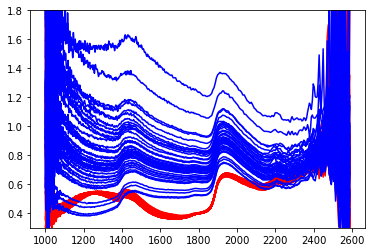

In [42]:
fig, ax = plt.subplots()

ax.set_ylim(0.3, 1.8)
for i in range(absorb003.shape[0]):
    ax.plot(ftir_waves, absorb003[i, :], 'r-')
for i in range(absorb009.shape[0]):
    ax.plot(ftir_waves, absorb009[i, :], 'b-')

In [43]:
vis_absorb009 = h5_file[f'session003/cal002/ins009/spectrometer1/derived/absorbances'][:]


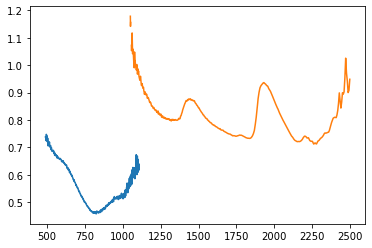

In [46]:
plt.plot(vis_waves, vis_absorb009.mean(axis=0))
plt.plot(ftir_waves, absorb009.mean(axis=0))

In [47]:
vis_absorb003 = h5_file[f'session003/cal001/ins003/spectrometer1/derived/absorbances'][:]

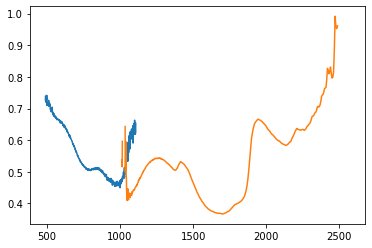

In [48]:
plt.plot(vis_waves, vis_absorb003.mean(axis=0))
plt.plot(ftir_waves, absorb003.mean(axis=0))

In [49]:
h5_file.close()

In [50]:
file_name = "data/210409/blank2_210409.h5"
h5_file = h5py.File(file_name, "r")
insertions = list(h5_file['session001/cal001'].keys())
waves = h5_file['session001/cal001'].attrs['spec1_wavelengths_vector'][:]


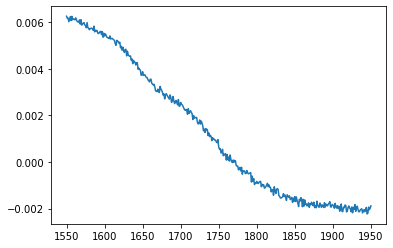

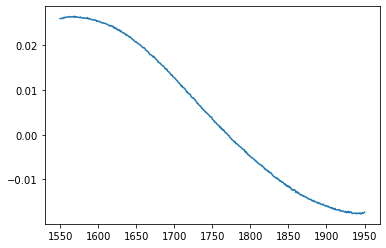

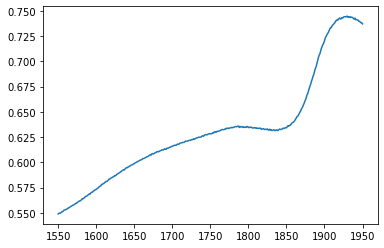

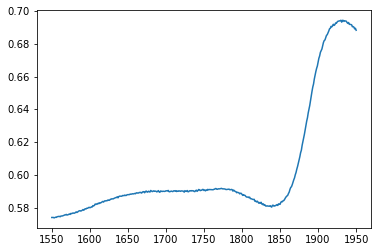

In [51]:
for insertion in insertions:
    fig, ax = plt.subplots()
    absorb = h5_file[f'session001/cal001/{insertion}/spectrometer1/derived/absorbances'][:]
    ax.plot(waves, absorb.mean(axis=0))

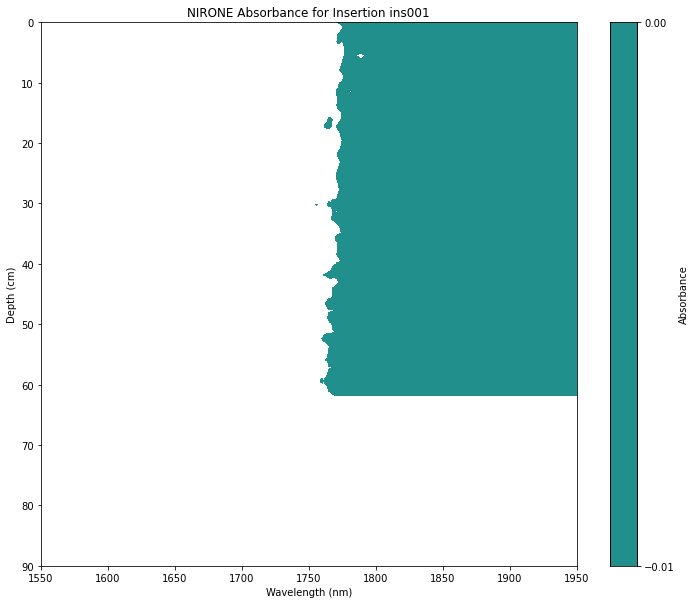

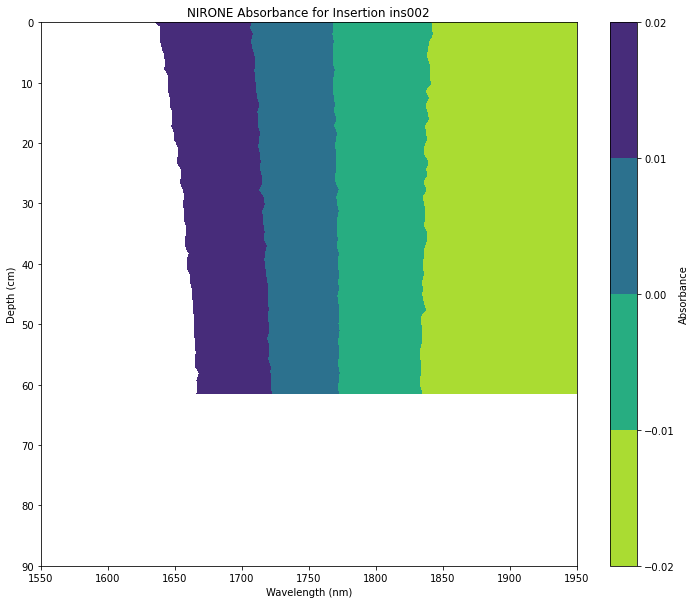

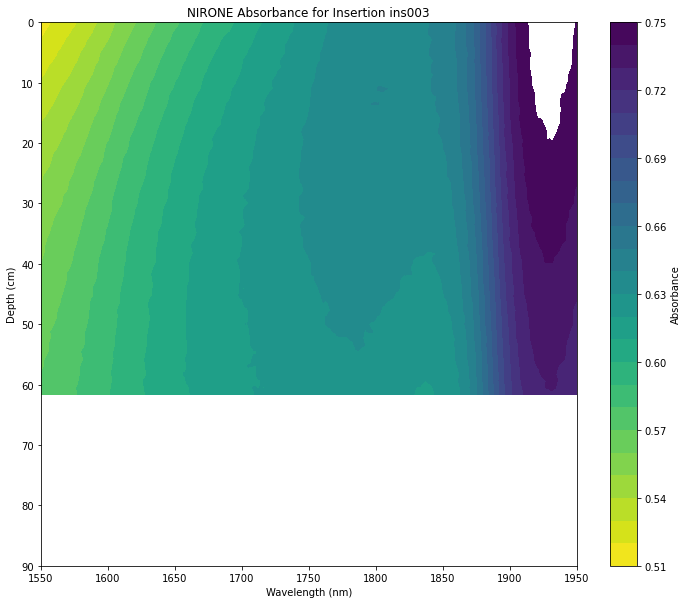

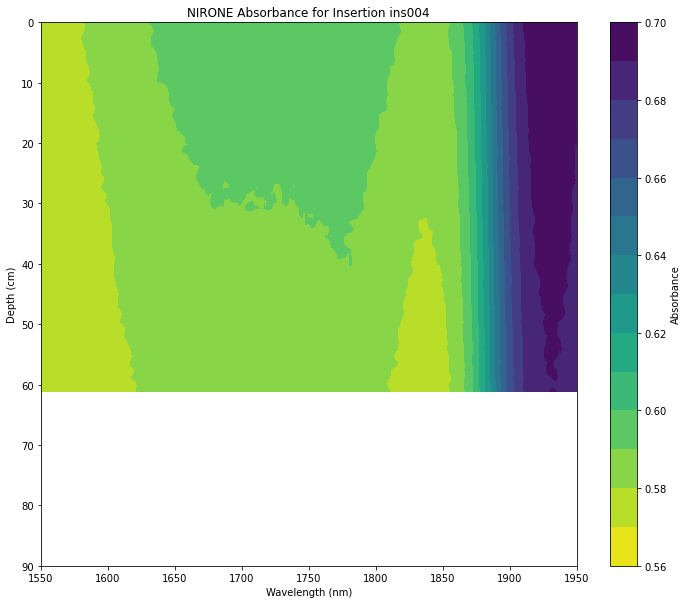

In [61]:
for insertion in insertions:
    ins_abs = h5_file[f'session001/cal001/{insertion}/spectrometer1/derived/absorbances'][:]
    ins_depths = h5_file[f'session001/cal001/{insertion}/derived/absorbance_depth'][:, -1]
    y = ins_depths
    x = waves
    z = savgol_filter(ins_abs, 15, 3, axis=1)
    X, Y = np.meshgrid(x, y)
    
    amin = np.nanmin(ins_abs)
    amax = np.nanmax(ins_abs)
    
    
    levels = np.arange((amin - amin % 0.01), amax, 0.01)
    #clevels = [0.50, 0.60, 0.70]
    fig, ax = plt.subplots(figsize = (12,10))
    
    ax.set_ylim(90, 0)
    ax.set_ylabel("Depth (cm)")
    ax.set_xlabel("Wavelength (nm)")
    ax.set_title(f"NIRONE Absorbance for Insertion {insertion}")
    cont = ax.contourf(X, Y, z, levels=levels, cmap='viridis_r')
    # ax.contour(X, Y, z, levels=clevels, colors='k', linewidths=0.8)

    cbar = fig.colorbar(cont)
    cbar.ax.set_ylabel('Absorbance')

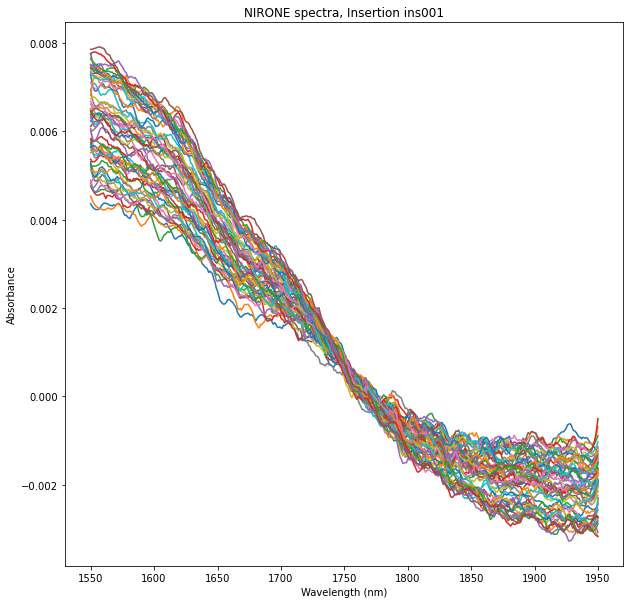

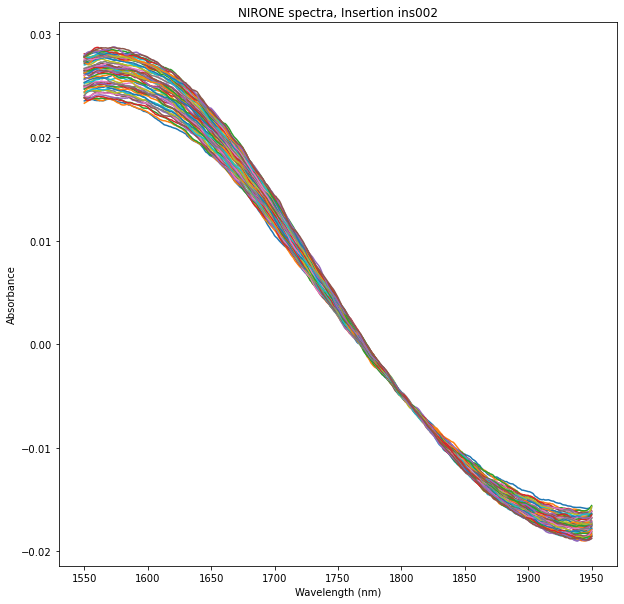

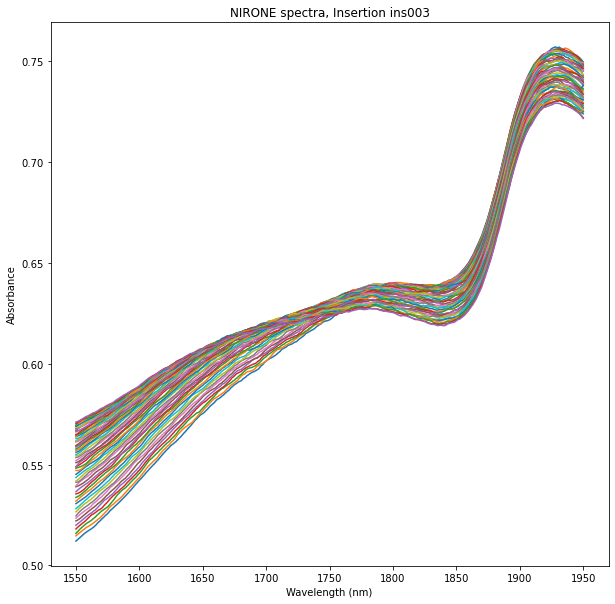

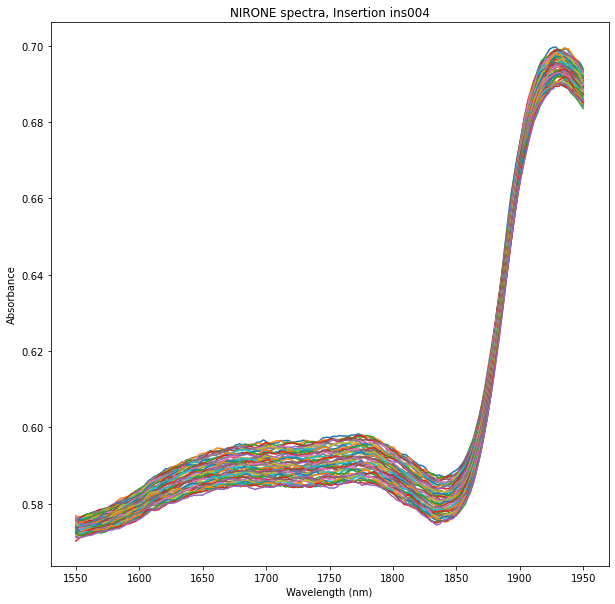

In [66]:
for insertion in insertions:
    ins_abs = h5_file[f'session001/cal001/{insertion}/spectrometer1/derived/absorbances'][:]
    fix, ax = plt.subplots(figsize=(10,10))
    ax.set_title(f"NIRONE spectra, Insertion {insertion}")
    ax.set_ylabel("Absorbance")
    ax.set_xlabel("Wavelength (nm)")
    for i in range (ins_abs.shape[0]):
        ax.plot(waves, savgol_filter(ins_abs[i,:], 15, 3))
    plt.show()

In [67]:
ins003 = h5_file[f'session001/cal001/ins003/spectrometer1/derived/absorbances'][:]
ins004 = h5_file[f'session001/cal001/ins004/spectrometer1/derived/absorbances'][:]

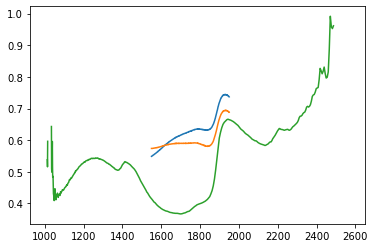

In [70]:
plt.plot(waves, ins003.mean(axis=0))
plt.plot(waves, ins004.mean(axis=0))
plt.plot(ftir_waves, absorb003.mean(axis=0))

In [71]:
h5_file.close()